## Plot sigma_DA and sigma_Hz from cases with different spec-z galaxy number densities (redshift success rates). Update it to show the joint analysis of spec-z+cross. --04-25-2023

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys
from pathlib import Path
sys.path.append("/home/zjding/csst_bao/fisher_pkmu/")
from mcmc_funs import growth_factor
from astropy.table import Table

In [3]:
speed_c = 299792.458    # speed of light, km/s
Omega_m = 0.3075

survey_area = 17500.0
kmax = 0.3
kwidth = 0.005
zmin = 0.
zmax = 1.6
nzbins = 8
zbins = np.linspace(zmin, zmax, nzbins+1)

const_low = 0.99
const_up = 1.01

skyarea_total = 4*np.pi * (180./np.pi)**2.0
fsky = survey_area/skyarea_total
G_0 = growth_factor(0.0, Omega_m)       # G_0 at z=0, normalization factor 

# ## estimate the power spectrum damping parameter $\Sigma_{specz}$, $\Sigma_{pz}$ from the spec-z and photo-z uncertainty
sigma_specz = 0.002
#sigma_photoz = 0.05
sigma_photoz = 0.025
# Finger-of-God damping term
Sigma_fog = 7.0

fsky_cosmos = 2.0/skyarea_total
fsky_zcosmos = 1.7/skyarea_total

Pspecz_sys = "1.0"

In [4]:
idir0 = "/home/zjding/csst_bao/fisher_pkmu/BAO_part/Fisher_sigma_alphas/numerical_method/default/output/"

In [5]:
recon_dir_list = ["pre_recon", "post_recon"]
text_list = ["Pre-recon", "Post-recon"]
tracer_list = ['photoz', 'specz', 'specz_add_cross', 'specz_photoz_add_cross']
label_list = ['photo-z', 'spec-z', 'spec-z+cross', 'spec-z+cross+photo-z']
line_list = ['--', ':', '-.', '-']
marker_list = ['x', 's', '>', 'o']

Pspeczsys_list = ["1.0", "6.e2", "1.e3", "2.e3", "3.e3", "4.e3", "5.e3", "6.e3", "7.e3", "8.e3", "9.e3", "1.e4"]

f0eff_list = [0.3, 0.5, 0.7]
f0eff_dir_list = ['f0eff0.3/', '', 'f0eff0.7/']

if Sigma_fog > 0.0:
    params_str_list = ['11101010101010', '11110101010101', '11111111111111', '11111111111111']

## we specifically focus on the spec-z+cross case. 

In [6]:
tracer_id = 2
tracer, params_str = tracer_list[tracer_id], params_str_list[tracer_id]

In [7]:
recon_dir = "pre_recon"

sigma_alpha_perp_all = []
sigma_alpha_para_all = []

for f0eff, f0eff_dir in zip(f0eff_list, f0eff_dir_list):
    sigma_alpha_perp_list = []
    sigma_alpha_para_list = []
    for Pspecz_sys in Pspeczsys_list:
        
        alpha_dir = idir0 + f"sigma_alpha/vary_params_{const_low}_{const_up}/Sigma_fog_{Sigma_fog}/{recon_dir}/k_width{kwidth}/Pspecz_sys{Pspecz_sys}/params_bf1.0/{f0eff_dir}"
        
        filename = "sigma_alpha_{0}_tracer_zerror_specz{1:.3f}_photoz{2:.3f}_kmax{3:.2f}_params{4}.npz".format(tracer, sigma_specz, sigma_photoz, kmax, params_str)

        alpha_dir_temp = alpha_dir
        ifile = Path(alpha_dir, filename)
        data = np.load(ifile)
        sigma_alphas_mar = data['alphas_mar']

        sigma_alpha_perp_list.append(sigma_alphas_mar[:, 2])
        sigma_alpha_para_list.append(sigma_alphas_mar[:, 3])

    sigma_alpha_perp_all.append(sigma_alpha_perp_list)
    sigma_alpha_para_all.append(sigma_alpha_para_list)

In [8]:
sigma_alphas_mar

array([[ 0.        ,  0.2       ,  0.08020688,  0.29773252, -0.30562018],
       [ 0.2       ,  0.4       ,  0.03031482,  0.11089108, -0.29149453],
       [ 0.4       ,  0.6       ,  0.01919674,  0.06893416, -0.28367052],
       [ 0.6       ,  0.8       ,  0.01433187,  0.05117026, -0.28027743],
       [ 0.8       ,  1.        ,  0.01193249,  0.0423839 , -0.27667524],
       [ 1.        ,  1.2       ,  0.01192925,  0.04426649, -0.26129823],
       [ 1.2       ,  1.4       ,  0.01722098,  0.08162364, -0.22755708],
       [ 1.4       ,  1.6       ,  0.03403904,  0.26679931, -0.23645119]])

In [9]:
z_mid = (sigma_alphas_mar[:, 0] + sigma_alphas_mar[:, 1])/2.0
z_mid

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

In [10]:
odir = "./figs/z{0:.1f}_{1:.1f}_{2}zbins/".format(zmin, zmax, nzbins)
if not os.path.exists(odir):
    os.makedirs(odir)

## plot the relative difference of the constraints on D_A/r_d

In [11]:
sigma_alpha_perp_all[1][1]

array([0.05107806, 0.01881238, 0.01178383, 0.00873066, 0.00750411,
       0.00954512, 0.01791481, 0.03929085])

<Figure size 432x288 with 0 Axes>

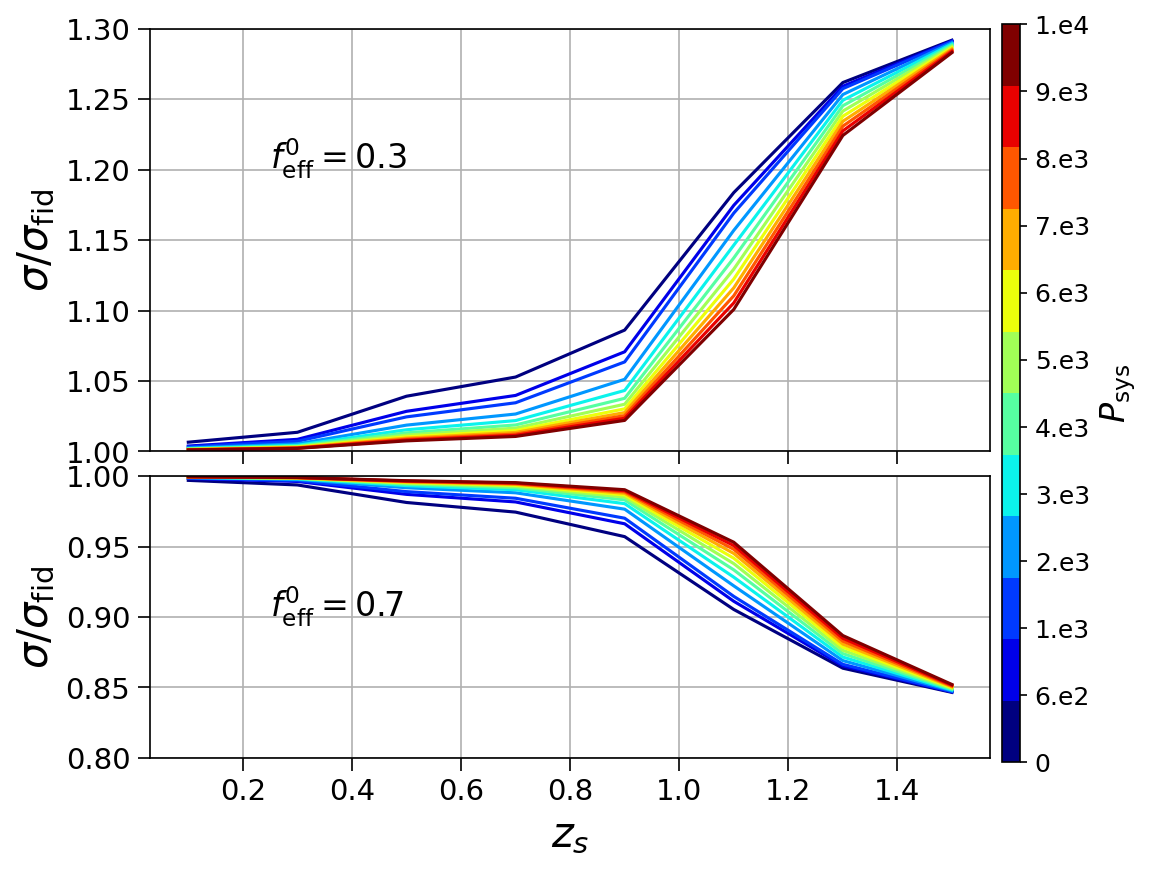

In [12]:
plt.clf()
cmap = plt.get_cmap('jet', len(Pspeczsys_list))
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6), sharex=True, gridspec_kw={'height_ratios': [3, 2]}, dpi=150)
plt.subplots_adjust(
    left=0.15,
    bottom=0.15,
    right=0.85,
    top=0.96,
    wspace=0.,
    hspace=0.07,
)

for i, sigma_alpha_perp in enumerate(sigma_alpha_perp_all[0]):
    axes[0].plot(z_mid, sigma_alpha_perp/sigma_alpha_perp_all[1][i], color=cmap(i))
    #axes[0].plot(z_mid, sigma_alpha_para_all[0][i]/sigma_alpha_para_all[1][i], ls=':', color=cmap(i))


for i, sigma_alpha_perp in enumerate(sigma_alpha_perp_all[2]):
    axes[1].plot(z_mid, sigma_alpha_perp/sigma_alpha_perp_all[1][i], color=cmap(i))
    #axes[1].plot(z_mid, sigma_alpha_para_all[2][i]/sigma_alpha_para_all[1][i], ls=':', color=cmap(i))
    
# Normalizer
norm = mpl.colors.Normalize(vmin=0, vmax=1)
  
# creating ScalarMappable
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

## 4-tuple of floats *rect* = ``[left, bottom, width, height]``
cax = plt.axes([0.86, 0.145, 0.015, 0.82])

cbar = plt.colorbar(sm, cax=cax, ticks=np.linspace(0, 1, len(Pspeczsys_list)))
cbar.set_ticklabels([0]+Pspeczsys_list[1:], fontsize=12)
cbar.set_label(label=r"$P_{\mathrm{sys}}$", fontsize=16)

for i in range(2):
    axes[i].grid()
    axes[i].tick_params(axis='both', which='major', length=6, labelsize=14)
    axes[i].tick_params(axis='both', which='minor', length=3, labelsize=12)
    
axes[0].text(0.25, 1.2, r"$f^0_{\mathrm{eff}}=0.3$", fontsize=16)
axes[1].text(0.25, 0.9, r"$f^0_{\mathrm{eff}}=0.7$", fontsize=16)
axes[0].set_ylim([1.0, 1.3])
#axes[1].set_ylim([0.83, 1.0])
axes[1].set_ylim([0.8, 1.0])
axes[0].set_ylabel(r"$\sigma/\sigma_{\mathrm{fid}}$", fontsize=20)
axes[1].set_xlabel(r"$z_s$", fontsize=20)
axes[1].set_ylabel(r"$\sigma/\sigma_{\mathrm{fid}}$", fontsize=20)
    
filename = "sigma_DA_ratio_specz_cross_diff_f0eff.png"
ofile = odir + filename
plt.savefig(ofile)